# Difference of Exponential Moving Averages (EMAs) as proxy for change

This notebook shows the use of the absolute difference of a pixel-wise fast and slow exponential moving average as a proxy for rate of change of the observed scattering signal, which itself may be used as a proxy for changes in the physical characteristics of the sample

In [1]:
from typing import Tuple, List

from numpy import ndarray, dtype, floating, bool_, s_, mean, abs
from numpy.ma import  MaskedArray, masked_where
from matplotlib.pyplot import plot, figure

from adcorr.corrections import mask_frames
from sample_degradation.reading import map_frames, load_data

In [2]:
FILE_PATH = "/dls/i22/data/2022/sm30693-1/i22-623617.nxs"
FRAMES_KEY = "entry1/instrument/detector/data"

FAST = 0.4
SLOW = 0.2

In [3]:
mask: ndarray[Tuple[int, int], bool_] = load_data(FILE_PATH, "entry1/instrument/detector/pixel_mask")

In [4]:
fast_ema: MaskedArray[Tuple[int, int], dtype[floating]] = mask_frames(
    load_data(FILE_PATH, FRAMES_KEY, s_[0, 0, :, :]),
    mask,
)
slow_ema: MaskedArray[Tuple[int, int], dtype[floating]] = mask_frames(
    load_data(FILE_PATH, FRAMES_KEY, s_[0, 0, :, :]),
    mask,
)

metric: List[float] = []

for frame in map_frames(FILE_PATH, FRAMES_KEY):
    masked_frame = masked_where(mask, frame)
    fast_ema = (1 - FAST) * fast_ema + FAST * frame
    slow_ema = (1 - SLOW) * slow_ema + SLOW * frame
    metric.append(mean(abs(fast_ema - slow_ema)))

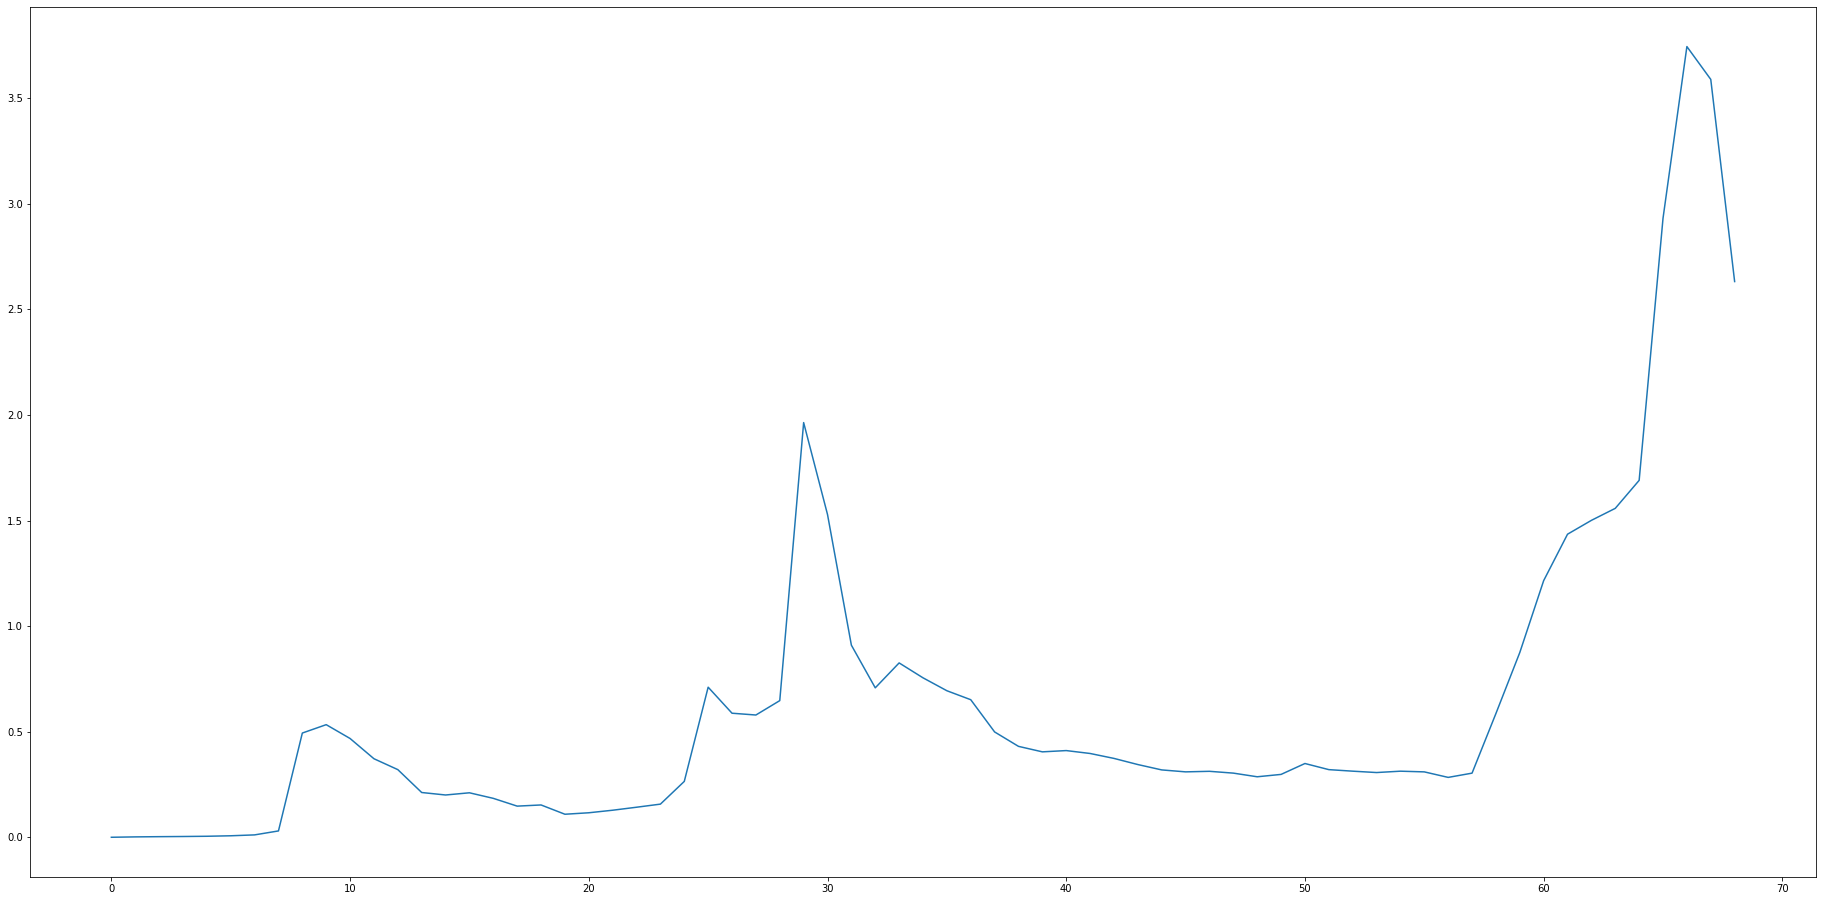

In [5]:
fig = figure(figsize=(32, 16))
plot(metric)